# Want to Visit Munich? Check When to Visit and Where to Stay

The project goal is to analyze Airbnb listings in Munich city using CRISP-DM process.

The Cross Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. The process steps are as below:

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

## Business understanding

Munich is one of the biggest cities in Germany and Europe. Every year many local and international tourists visit the city for business and leisure purposes.

In this project, we want to find out insights of Munich housing market using the dataset of Airbnb rentals for Munich. 


### Questions of Interest

1) When is it cheapest and when is it most expensive to visit Munich?

2) Which neighborhood has the cheapest rentals and which neighborhood has the most expensive one?

3) What are the top 5 amenities available in Munich Airbnb rentals?

## Data

The data of Munich AirBnB listing for 23rd September, 2023 used for this analysis is available in the following site: [link](http://insideairbnb.com/get-the-data.html). There are 2 separate data files used and they are:

- listings: Detailed list of AirBnB booking in 23rd September, 2023 in Munich
- calendar: Time stamps of the bookings for the same date

## Data Understanding

We will explore the dataset in the first step

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer 
%matplotlib inline

In [2]:
# loading listings dataset

df_listings = pd.read_csv('listings.csv')

In [3]:
# info for listings dataframe

df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7336 non-null   int64  
 1   listing_url                                   7336 non-null   object 
 2   scrape_id                                     7336 non-null   int64  
 3   last_scraped                                  7336 non-null   object 
 4   source                                        7336 non-null   object 
 5   name                                          7336 non-null   object 
 6   description                                   7191 non-null   object 
 7   neighborhood_overview                         2926 non-null   object 
 8   picture_url                                   7336 non-null   object 
 9   host_id                                       7336 non-null   i

In [4]:
# header for listings dataframe

df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50937113,https://www.airbnb.com/rooms/50937113,20230922223227,2023-09-23,previous scrape,Rental unit in Munich · 1 bedroom · 1 bed · 1 ...,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/e9933e6c-fb07...,34019839,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,676007794384862490,https://www.airbnb.com/rooms/676007794384862490,20230922223227,2023-09-23,previous scrape,Rental unit in Munich · 1 bedroom · 1 bed · 1 ...,Unsere Wohnung bietet eine Menge Platz für zwe...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,90764632,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
2,720879719372870415,https://www.airbnb.com/rooms/720879719372870415,20230922223227,2023-09-23,previous scrape,Rental unit in Munich · 1 bedroom · 1 bed · 1 ...,"1,5 Zimmer Appartement, zentral gelegen, 5 Min...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,223300367,...,4.0,5.0,4.0,NaN,f,1,1,0,0,0.08
3,41224455,https://www.airbnb.com/rooms/41224455,20230922223227,2023-09-23,city scrape,Townhouse in Munich · 4 bedrooms · 6 beds · 3....,"Rent an entire beautiful and bright house, 6rm...",Our neighbourhood is perfect for families:<br ...,https://a0.muscache.com/pictures/c0ff1507-9b84...,5666804,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,52179501,https://www.airbnb.com/rooms/52179501,20230922223227,2023-09-23,previous scrape,Rental unit in Munich · 1 bedroom · 1 bed · 1 ...,Das Appartement verfügt über einen Schlaf-/Woh...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,13552115,...,5.0,5.0,5.0,NaN,f,2,1,1,0,0.15


In [5]:
# columns with no missing values

set(df_listings.columns[df_listings.isnull().mean()== 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'has_availability',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'name',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'number_of_reviews_l30d',
 'number_of_reviews_ltm',
 'picture_url',
 'price',
 'propert

In [6]:
# columns with more than 75% missing values

set(df_listings.columns[df_listings.isnull().mean()>0.750])

{'bathrooms', 'calendar_updated', 'license', 'neighbourhood_group_cleansed'}

In [7]:
# columns with more than 100% missing values

set(df_listings.columns[df_listings.isnull().mean()==1.0])

{'bathrooms', 'calendar_updated', 'neighbourhood_group_cleansed'}

In [8]:
df_listings['neighbourhood_cleansed'].nunique()

25

In [9]:
#Neighborhoods with count
df_listings['neighbourhood_cleansed'].value_counts()

Ludwigsvorstadt-Isarvorstadt                              927
Maxvorstadt                                               613
Au-Haidhausen                                             484
Schwabing-West                                            455
Neuhausen-Nymphenburg                                     443
Schwabing-Freimann                                        353
Bogenhausen                                               315
Ramersdorf-Perlach                                        307
Schwanthalerhöhe                                          291
Sendling-Westpark                                         284
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    280
Sendling                                                  268
Obergiesing                                               264
Milbertshofen-Am Hart                                     258
Altstadt-Lehel                                            245
Laim                                                      221
Tudering

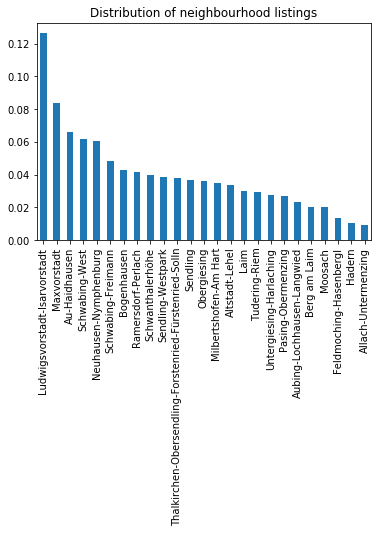

In [10]:
# Distribution of Neighbourhood
neighbourhood_count = df_listings['neighbourhood_cleansed'].value_counts()

(neighbourhood_count/df_listings.shape[0]).plot(kind="bar");
plt.title("Distribution of neighbourhood listings");

In [11]:
#Available type of rooms with count
df_listings['room_type'].value_counts()

Entire home/apt    4808
Private room       2416
Shared room          77
Hotel room           35
Name: room_type, dtype: int64

Below are the key insights of listings dataframe:

- Dataframe has 7336 rows and 75 columns
- 3 columns have no data at all
- Total available neighborhoods in Munich are 25 and Ludwigsvorstadt-Isarvorstadt has the most offerings
- Most common types of room offerings are either entire home/apt. or private room 

Points to consider for data wrangling:

- 'price' column is object and needs to be transformed to values
- dropping 3 columns with 100% missing values

In [12]:
# loading calendar dataset

df_calendar = pd.read_csv('calendar.csv')

In [13]:
# info for calendar dataframe

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677641 entries, 0 to 2677640
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 143.0+ MB


In [14]:
# header for calendar dataframe

df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,97945,2023-09-23,f,$120.00,$120.00,2,90
1,97945,2023-09-24,f,$120.00,$120.00,2,90
2,97945,2023-09-25,t,$120.00,$120.00,2,90
3,97945,2023-09-26,f,$80.00,$80.00,2,90
4,97945,2023-09-27,f,$80.00,$80.00,2,90


In [15]:
# columns with no missing values

set(df_calendar.columns[df_calendar.isnull().mean()== 0])

{'adjusted_price',
 'available',
 'date',
 'listing_id',
 'maximum_nights',
 'minimum_nights',
 'price'}

This means calendar data is complete any no column has any missing values. There are two columns with price and we need to check if both columns are identical.

In [16]:
# checking if 'price' and 'adjusted_price' are identical

df_calendar['price'].equals(df_calendar['adjusted_price'])

False

So the columns 'price' and 'adjusted price' are not equal but for the sake of simplicity, we will analyze the column 'price' only

Below are the key insights from calendar dataframe:

- Dataframe has 2677640 rows and 7 columns with no missing values

Points to consider for data wrangling:

- 'date' column is string and needs to be transformed into date format
- 'price' column is string and needs to be transformed into values
- 'adjusted_price' is string and needs to be transformed into values

## Data Preparation
In this step, we will transform the data and handle the missing values

### listings dataframe

- 'price' column is object and needs to be transformed to values
- dropping 3 columns with 100% missing values

In [17]:
def price_cleaning(x):
    """
    function to clean the price column by eliminating the '$' and ',' 
    from the string and return a float to be stored in the column
    """
    try:
        if ',' in x:
            x = x.replace(',','')
        x = x[1:]
        return float(str(x))
    except:
        return x

In [18]:
#converting 'price' column from string to float

df_listings['price'] = df_listings['price'].apply(lambda x: price_cleaning(x))

In [19]:
#dropping columns with 100% missing values

df_listings = df_listings.loc[:, df_listings.isin([' ','NULL',0]).mean() == 0]

### calendar dataframe

- 'date' column is string and needs to be transformed into date format
- 'price' column is string and needs to be transformed into values
- 'adjusted_price' is string and needs to be transformed into values

In [20]:
#converting 'price' and 'adjusted_price' columns from string to float

df_calendar['price'] = df_calendar['price'].apply(lambda x: price_cleaning(x))
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].apply(lambda x: price_cleaning(x))

In [21]:
# change the date column from string to datetime 

df_calendar['date'] = pd.to_datetime(df_calendar['date'])

For convenience of the analysis, we can add month and year to the calendar dataframe

In [22]:
# adding month and year column to the calender dataframe

df_calendar['month'], df_calendar['year'] = df_calendar.date.dt.month, df_calendar.date.dt.year

## Modeling
In this step, we will define necessary variables and functions to find the answers to our question

### Questions of Interest

1) When is it cheapest and when is it most expensive to visit Munich?

2) Which neighboorhood has the cheapest rentals and which neighborhood has the most expensive ones?

3) What are the top 5 amenities available in Munich Airbnb rentals?

In [23]:
# 1) When is it cheapest and when is it most expensive to visit Munich?
# most expensive and least expensive months in Munich

month_mean_price = df_calendar.groupby(['month'])['price'].mean()

month_max_price = month_mean_price.idxmax()
month_min_price = month_mean_price.idxmin()

In [24]:
# 2) Which neighboorhood has the cheapest rentals and which neighborhood has the most expensive ones?
# most expensive and least expensive neighborhood in Munich

neighborhood_mean_price = df_listings.groupby(['neighbourhood_cleansed'])['price'].mean()

neighborhood_max_price = neighborhood_mean_price.idxmax()
neighborhood_min_price = neighborhood_mean_price.idxmin()

In [25]:
# 3) What are the top 5 amenities available in Munich Airbnb rentals?
# Ranking top 5 amenities

amenities = df_listings['amenities'].apply(lambda x: [a.replace('{', '').replace('}', '').replace('"', '') for a in x.split(',')])

mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(amenities), index=amenities.index, columns=mlb.classes_)
amenities_count=amenities_result.sum().sort_values(ascending=False)

## Evaluation
In this step, we will evaluate our answers

### 1) When is it cheapest and when is it most expensive to visit Munich?

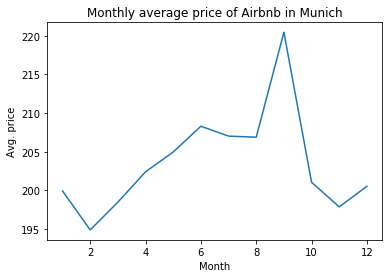

In [26]:
#plotting average monthly price
df_calendar.groupby(['month'])['price'].mean().plot()
plt.title('Monthly average price of Airbnb in Munich');
plt.xlabel('Month');
plt.ylabel('Avg. price');

In [27]:
print('Cheapest month for Airbnb rentals in Munich is',
      calendar.month_name[month_min_price],
      'and most expensive month is',
      calendar.month_name[month_max_price])

Cheapest month for Airbnb rentals in Munich is February and most expensive month is September


This means September is the most expensive month to visit Munich and February is the cheapest. One of the reason for September being most expensive is the fact that [largest volksfest of the world](https://www.t-online.de/leben/reisen/deutschland/id_59089408/oktoberfest-2023-alle-infos-zu-oeffnungszeiten-bierpreis-und-anfahrt-.html) "Oktoberfest" takes place primarily in September. Therefore, tourists, who are not participating in Oktoberfest, can get better Airbnb offerings in other months.

### 2) Which neighborhood is most expensive and which is least expensive in Munich?

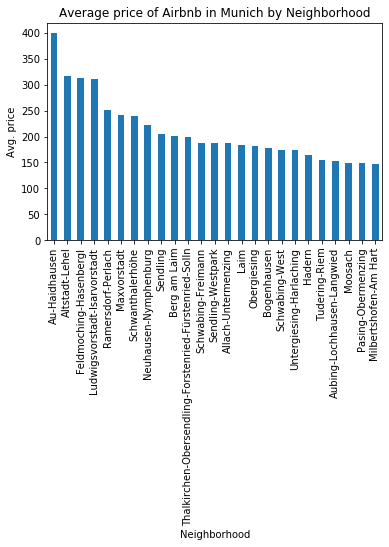

In [28]:
#plotting average price by neighborhood

neighborhood_mean_price.sort_values(ascending=False).plot(kind='bar')
plt.title('Average price of Airbnb in Munich by Neighborhood');
plt.xlabel('Neighborhood');
plt.ylabel('Avg. price');

In [29]:
print('Cheapest neighborhood for Airbnb rentals in Munich is',
      neighborhood_min_price,
      'and most expensive neighborhood is',
      neighborhood_max_price)

Cheapest neighborhood for Airbnb rentals in Munich is Milbertshofen-Am Hart and most expensive neighborhood is Au-Haidhausen


So, Milbertshofen-Am Hart is the cheapest neighborhood and Au-Haidhausen is the most expensive one. It is evident from looking at the neighborhood map of Munich is that neighborhoods in and near the city center have pricier Airbnb rentals compared to neighborhoods further away from the center.

### 3) What are the top 5 amenities available?

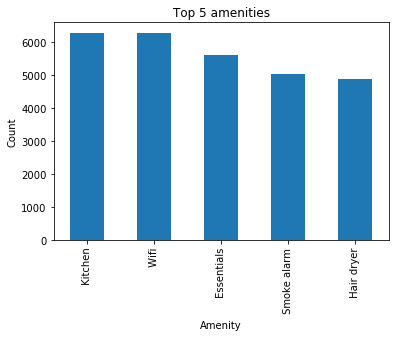

In [30]:
# top 5 amenities
amenities_count[:5].plot(kind='bar')
plt.title('Top 5 amenities');
plt.xlabel('Amenity');
plt.ylabel('Count');

In [31]:
print('Top 5 amenities available in Munich Airbnb rentals are:', ','.join(amenities_count[:5].index))

Top 5 amenities available in Munich Airbnb rentals are:  Kitchen, Wifi, Essentials, Smoke alarm, Hair dryer


Most Airbnb rentals come with Kitchen and Wifi, which is not a big surprise considering these are absolute must for tourists. Other top amenities are essentials, smoke alarm and hair dryer that provide added comfort and security for travelers.

### Conclusion

In this project, Munich housing data of Airbnb rentals has been explored, cleaned and analyzed to find the following results:

- September is the most expensive month to visit Munich and February is the cheapest.
- Milbertshofen-Am Hart is the cheapest neighborhood in Munich and Au-Haidhausen is the most expensive one.
- Top 5 amenities available in the Airbnb rentals in Munich are Kitchen, Wifi, Essentials, Smoke alarm and Hairdryer.

### Medium Blog Post

Summarized article on the main findings of this project can be found [here](https://medium.com/@bhuiyan.mrahman01/want-to-visit-munich-check-when-to-visit-and-where-to-stay-f2717521c0be)

### Licensing, Authors and Acknowledgement

- Data Source:
    1. http://insideairbnb.com/get-the-data.html
    2. https://www.t-online.de/leben/reisen/deutschland/id_59089408/oktoberfest-2023-alle-infos-zu-oeffnungszeiten-bierpreis-und-anfahrt-.html
    3. Munich map: By Maximilian Dörrbecker (Chumwa) - Own work, using OpenStreetMap data for the background, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=18148364

- Acknowledgement: Special thanks for Airbnb for open sourcing the housing data

- License: This work is licensed under a [Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License](https://creativecommons.org/licenses/by-nc-nd/4.0/). Please refer to Udacity [Terms of Service](https://www.udacity.com/legal) for further information.